In [96]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import copy
import matplotlib.pyplot as plt

import seaborn as sns

In [79]:
def pca(data, dim):
    row, col = np.shape(data)
    mean = []
    for i in range(col):
        mean.append(np.mean(data[:, i]))
    mean = np.array(mean)
    normData = (data - mean) / (col - 1)
    scatterMatrix = np.dot(normData.T, normData)
    eigVal, eigVec = np.linalg.eig(scatterMatrix)
    print("eigVal = {} \n".format(eigVal))
    weight = []
    for i in eigVal:
        weight.append(i / sum(eigVal))
    print("weight = {}".format(weight))
    eigPairs = [(np.abs(eigVal[i]), eigVec[:, i]) for i in range(col)]

    eigPairs.sort(reverse=True)
    print("eigPairs = {} ".format(eigPairs))
    feature = np.array([ele[1] for ele in eigPairs[:dim]])
    data = np.dot(normData, np.transpose(feature))
    # print(data)
    return data, normData, weight

In [80]:
def nativePca(data, dim):
    pca = PCA(n_components=dim)
    pca.fit(data)  # fit the model
    return pca.fit_transform(data)  # 变化后的数据

In [121]:
data = pd.read_csv("1.House Price - 副本.csv")

In [122]:
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,30,0,False,True,False,Ostad Moein,500000000,16666.67
1,32,1,False,True,False,Hashemi,610000000,20333.33
2,32,1,False,True,True,Eskandari,940000000,31333.33
3,33,1,False,True,False,Beryanak,560000000,18666.67
4,35,1,False,True,False,Salsabil,660000000,22000.00
...,...,...,...,...,...,...,...,...
3474,3600,2,False,False,False,Shahryar,9720000000,324000.00
3475,2550000000,2,True,True,True,Central Janatabad,2550000000,85000.00
3476,3310000000,2,True,True,True,Ostad Moein,3310000000,110333.33
3477,8400000000,2,True,True,True,Gheitarieh,8700000000,290000.00


In [123]:
data_2 = data_1 = copy.deepcopy(data)

In [124]:
data_1

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,30,0,False,True,False,Ostad Moein,500000000,16666.67
1,32,1,False,True,False,Hashemi,610000000,20333.33
2,32,1,False,True,True,Eskandari,940000000,31333.33
3,33,1,False,True,False,Beryanak,560000000,18666.67
4,35,1,False,True,False,Salsabil,660000000,22000.00
...,...,...,...,...,...,...,...,...
3474,3600,2,False,False,False,Shahryar,9720000000,324000.00
3475,2550000000,2,True,True,True,Central Janatabad,2550000000,85000.00
3476,3310000000,2,True,True,True,Ostad Moein,3310000000,110333.33
3477,8400000000,2,True,True,True,Gheitarieh,8700000000,290000.00


In [85]:
data_1 = data_1.drop('Parking', axis=1)
data_1 = data_1.drop('Warehouse', axis=1)
data_1 = data_1.drop('Elevator', axis=1)
data_1 = data_1.drop('Address', axis=1)

In [86]:
data_1

,Area,Room,Price,Price(USD)
0,30,0,500000000,16666.67
1,32,1,610000000,20333.33
2,32,1,940000000,31333.33
3,33,1,560000000,18666.67
4,35,1,660000000,22000.00
...,...,...,...,...
3474,3600,2,9720000000,324000.00
3475,2550000000,2,2550000000,85000.00
3476,3310000000,2,3310000000,110333.33
3477,8400000000,2,8700000000,290000.00


In [87]:
pcaData, normData, weight = pca(np.array(data_1.values, dtype=float), 2)

eigVal = [ 2.53542275e+22  3.87491088e+19  1.50572429e+02 -1.03799797e-02] 

weight = [0.9984740225839096, 0.0015259774160903468, 5.929688019744649e-21, -4.0877364817909847e-25]
eigPairs = [(2.535422748429331e+22, array([-8.28058266e-04, -5.31485726e-11, -9.99999657e-01, -3.33333219e-05])), (3.874910880838399e+19, array([-9.99999657e-01, -1.05716075e-11,  8.28058265e-04,  2.76018193e-08])), (150.57242908977142, array([ 9.57672418e-12, -8.97012030e-01,  1.47335853e-05, -4.42006129e-01])), (0.010379979680088636, array([-1.23243417e-13,  3.49380242e-05, -3.33333333e-05,  9.99999999e-01]))] 


In [88]:
pcaData

array([[ 1.61967610e+09,  1.57347097e+06],
       [ 1.58300944e+09,  1.60383244e+06],
       [ 1.47300948e+09,  1.69491885e+06],
       ...,
       [ 6.82096126e+08, -1.10098386e+09],
       [-1.11597486e+09, -2.79616220e+09],
       [-3.60478259e+09, -5.38076887e+09]])

In [73]:
weight

[0.9984740225839096,
 0.0015259774160903468,
 5.929688019744649e-21,
 -4.0877364817909847e-25]

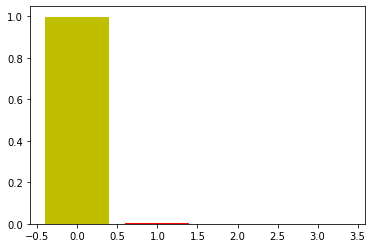

In [75]:
plt.bar(range(len(weight)), weight, color='yrgbk')
plt.show()

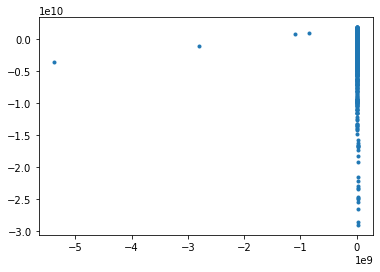

In [55]:
plt.plot(pcaData[:, 1], pcaData[:,0], '.')
plt.show()

In [77]:
nativePca(normData, 2)

array([[-1.61967610e+09, -1.57347097e+06],
       [-1.58300944e+09, -1.60383244e+06],
       [-1.47300948e+09, -1.69491885e+06],
       ...,
       [-6.82096126e+08,  1.10098386e+09],
       [ 1.11597486e+09,  2.79616220e+09],
       [ 3.60478259e+09,  5.38076887e+09]])

In [125]:
data_2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,30,0,False,True,False,Ostad Moein,500000000,16666.67
1,32,1,False,True,False,Hashemi,610000000,20333.33
2,32,1,False,True,True,Eskandari,940000000,31333.33
3,33,1,False,True,False,Beryanak,560000000,18666.67
4,35,1,False,True,False,Salsabil,660000000,22000.00
...,...,...,...,...,...,...,...,...
3474,3600,2,False,False,False,Shahryar,9720000000,324000.00
3475,2550000000,2,True,True,True,Central Janatabad,2550000000,85000.00
3476,3310000000,2,True,True,True,Ostad Moein,3310000000,110333.33
3477,8400000000,2,True,True,True,Gheitarieh,8700000000,290000.00


In [130]:
data_2['Parking'] = data_2["Parking"].map(lambda x: x*1)
data_2['Warehouse'] = data_2["Warehouse"].map(lambda x: x*1)
data_2['Elevator'] = data_2["Elevator"].map(lambda x: x*1)
data_2 = data_2.drop('Address',axis=1)

In [131]:
data_2

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,30,0,0,1,0,500000000,16666.67
1,32,1,0,1,0,610000000,20333.33
2,32,1,0,1,1,940000000,31333.33
3,33,1,0,1,0,560000000,18666.67
4,35,1,0,1,0,660000000,22000.00
...,...,...,...,...,...,...,...
3469,750,5,1,1,0,3500000000,116666.67
3470,863,2,1,1,1,7830000000,261000.00
3471,900,3,1,1,0,8500000000,283333.33
3472,929,5,1,1,0,80000000000,2666666.67


In [132]:
data_2.drop(data_2.tail(5).index,inplace=True)

In [133]:
data_2

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,30,0,0,1,0,500000000,16666.67
1,32,1,0,1,0,610000000,20333.33
2,32,1,0,1,1,940000000,31333.33
3,33,1,0,1,0,560000000,18666.67
4,35,1,0,1,0,660000000,22000.00
...,...,...,...,...,...,...,...
3464,680,5,1,1,0,81600000000,2720000.00
3465,700,3,1,1,0,4500000000,150000.00
3466,700,3,1,1,0,7000000000,233333.33
3467,705,5,1,1,0,91000000000,3033333.33


In [134]:
cov = data_2.corr()

In [135]:
cov

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.698474,0.207157,0.078603,0.074220,0.751656,0.751656
Room,0.698474,1.000000,0.275142,0.129772,0.187828,0.567034,0.567034
Parking,0.207157,0.275142,1.000000,0.430722,0.432289,0.191736,0.191736
Warehouse,0.078603,0.129772,0.430722,1.000000,0.202727,0.110489,0.110489
Elevator,0.074220,0.187828,0.432289,0.202727,1.000000,0.118671,0.118671
Price,0.751656,0.567034,0.191736,0.110489,0.118671,1.000000,1.000000
Price(USD),0.751656,0.567034,0.191736,0.110489,0.118671,1.000000,1.000000


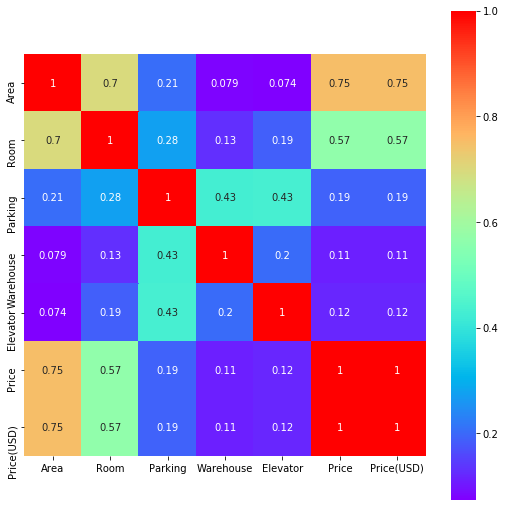

In [148]:
plt.figure(figsize=(9, 9))
sns.heatmap(cov, annot=True, vmax=1, square=True, cmap="rainbow")

In [137]:
data_2 = data_2.drop('Price(USD)', axis=1)

In [138]:
data_2

,Area,Room,Parking,Warehouse,Elevator,Price
0,30,0,0,1,0,500000000
1,32,1,0,1,0,610000000
2,32,1,0,1,1,940000000
3,33,1,0,1,0,560000000
4,35,1,0,1,0,660000000
...,...,...,...,...,...,...
3464,680,5,1,1,0,81600000000
3465,700,3,1,1,0,4500000000
3466,700,3,1,1,0,7000000000
3467,705,5,1,1,0,91000000000


In [143]:
pcaData, normData, weight = pca(np.array(data_2.values, dtype=float), 1)

eigVal = [0.00000000e+00 8.89732140e+21 5.64102154e+01 2.79860119e+01
 7.11047574e+00 1.30443400e+01] 

weight = [0.0, 1.0, 6.3401346146654816e-21, 3.1454423979960126e-21, 7.991703819157587e-22, 1.4660974222043872e-21]
eigPairs = [(8.897321395134463e+21, array([-6.05042913e-09, -5.35118455e-11, -8.60136508e-12, -3.85477001e-12,
       -6.05601025e-12, -1.00000000e+00])), (56.41021535509579, array([ 9.99500151e-01,  3.01250437e-02,  6.57620511e-03,  2.54310365e-03,
        6.49738141e-03, -6.04912260e-09])), (27.986011944852976, array([-9.98345002e-01, -1.72568413e-02,  3.11470802e-02,  1.56700632e-02,
        4.23528825e-02,  6.04075433e-09])), (13.044339961930579, array([ 9.87369900e-01, -5.25416363e-03,  8.91748881e-02,  8.52507403e-02,
       -9.92634121e-02, -5.97422496e-09])), (7.11047573737686, array([-9.96358654e-01,  2.46639625e-03, -5.01941738e-02,  6.76599060e-02,
        1.28852923e-02,  6.02835834e-09])), (0.0, array([-1.00000000e+00,  3.23769629e-19,  5.20419498e-20,  2.33

In [144]:
weight

[0.0,
 1.0,
 6.3401346146654816e-21,
 3.1454423979960126e-21,
 7.991703819157587e-22,
 1.4660974222043872e-21]

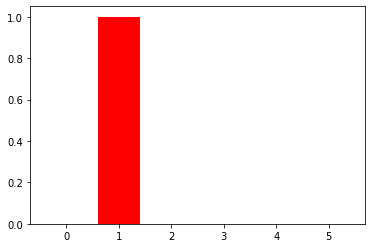

In [147]:
plt.bar(range(len(weight)), weight, color='yrgbk')
plt.show()

In [145]:
pcaData

array([[ 9.66403575e+08],
       [ 9.44403575e+08],
       [ 8.78403575e+08],
       ...,
       [-3.33596425e+08],
       [-1.71335964e+10],
       [-1.39335964e+10]])

In [146]:
nativePca(normData, 1)

array([[-9.66403575e+08],
       [-9.44403575e+08],
       [-8.78403575e+08],
       ...,
       [ 3.33596425e+08],
       [ 1.71335964e+10],
       [ 1.39335964e+10]])